<a href="https://colab.research.google.com/github/aymuos/starship/blob/main/fundamental_EDA/utils/d5c_seperator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

- translate cities from chinese to english cities
- break down into 3 different csvs.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

base = '/content/drive/MyDrive/ml'

Mounted at /content/drive


In [4]:
import pandas as pd

In [5]:
wdata = pd.read_csv(base+"/delivery_five_cities.csv")

In [6]:
names = wdata['from_city_name'].unique()

In [7]:
city_mapping = {
    '上海市': 'Shanghai',
    '重庆市': 'Chongqing',
    '杭州市': 'Hangzhou',
}

# Convert the from_city_name to English using the mapping
wdata['from_city_en'] = wdata['from_city_name'].map(city_mapping)

# Drop the original from_city_name column
wdata.drop(columns=['from_city_name'], inplace=True)

wdata["receipt_time"] = pd.to_datetime(
    "2021-" + wdata["receipt_time"],
    format="%Y-%m-%d %H:%M:%S"
)

wdata["sign_time"] = pd.to_datetime(
    "2021-" + wdata["sign_time"],
    format="%Y-%m-%d %H:%M:%S"
)

In [8]:
wdata.head()

,order_id,from_dipan_id,delivery_user_id,poi_lng,poi_lat,aoi_id,typecode,receipt_time,receipt_lng,receipt_lat,sign_time,sign_lng,sign_lat,ds,from_city_en
0,687227b4d0c733049b16ccd566db6e01,08331170e24742ba7a3938f5b34ff24d,18ff78d2069125937a847fb701a9db6c,1.056351e+07,-7.458321e+06,e0581ca18e7ca371a9869e041cb09075,4602b38053ece07a9ca5153f1df2e404,2021-03-18 13:35:00,1.056160e+07,-7.457998e+06,2021-03-18 14:51:00,NaN,NaN,318,Shanghai
1,55be8cdf1270526231c9ba3387f51b54,c5ac5ba99801aa6b85ba473d9260512b,df0b594618d1ba6f619e4e7dd034447c,8.899874e+06,-7.684936e+06,9c0f96ff01a71477334ef563001abc72,203ac3454d75e02ebb0a3c6f51d735e4,2021-03-18 08:32:00,8.900992e+06,-7.686103e+06,2021-03-18 14:33:00,NaN,NaN,318,Chongqing
2,ee46cae9ba2c002451af3c6fbcb49410,2129bfb99a2f6c11000c0ecbf1a5f3f6,05cceaaa5db96756294dd6d573fd865d,1.058131e+07,-7.467397e+06,4de9bf7f155046e7d0fd400672ab9cf3,203ac3454d75e02ebb0a3c6f51d735e4,2021-03-18 13:02:00,1.058124e+07,-7.467607e+06,2021-03-18 15:34:00,NaN,NaN,318,Shanghai
3,38912be86c83138901b5e26398832be7,08331170e24742ba7a3938f5b34ff24d,f29e97ef8398477abb72b852b16c91c0,1.056273e+07,-7.456804e+06,fe48cde9b33e2308641d985f8a701c7e,203ac3454d75e02ebb0a3c6f51d735e4,2021-03-18 12:11:00,1.056160e+07,-7.457997e+06,2021-03-18 14:08:00,NaN,NaN,318,Shanghai
4,2b83e2ba16714fee357694964d0e7e41,4fe96250270c2e17a28016a5fba4bc4a,1d00e6f2308aad233f0179aac63aa23d,1.044847e+07,-7.587086e+06,a7d4de5484ca867fe453976ba9fee424,4602b38053ece07a9ca5153f1df2e404,2021-03-18 07:28:00,1.044791e+07,-7.586259e+06,2021-03-20 12:40:00,NaN,NaN,318,Hangzhou


In [12]:
# Re-create city-specific DataFrames from wdata to ensure they are in memory
shanghai_df = wdata[wdata['from_city_en'] == 'Shanghai'].copy()
chongqing_df = wdata[wdata['from_city_en'] == 'Chongqing'].copy()
hangzhou_df = wdata[wdata['from_city_en'] == 'Hangzhou'].copy()

# Add horizon_ETA column to shanghai_df
shanghai_df['horizon_ETA'] = (shanghai_df['sign_time'] - shanghai_df['receipt_time']).dt.total_seconds() / 60

# Add horizon_ETA column to hangzhou_df
hangzhou_df['horizon_ETA'] = (hangzhou_df['sign_time'] - hangzhou_df['receipt_time']).dt.total_seconds() / 60

# Add horizon_ETA column to chongqing_df
chongqing_df['horizon_ETA'] = (chongqing_df['sign_time'] - chongqing_df['receipt_time']).dt.total_seconds() / 60

print(hangzhou_df.head())

                            order_id                     from_dipan_id  \
4   2b83e2ba16714fee357694964d0e7e41  4fe96250270c2e17a28016a5fba4bc4a   
7   21209805122ad6c7b39c203e77b8d9d8  3dbf3d4ed8dda395a48d49ada37ced6e   
11  2a0485367944dfe6e8a07ab7d56af824  051fce6f0670e28b56aa5db55680e2d2   
12  78b79811457f46ba8f193852f2b0aa0d  263083fc9891efc28d3f59fb7d48d22b   
18  47a1518ef70e375939189bad5a5eea40  545cc89e0c34a4e1eb2c6a0482dd3107   

                    delivery_user_id       poi_lng       poi_lat  \
4   1d00e6f2308aad233f0179aac63aa23d  1.044847e+07 -7.587086e+06   
7   868a64f65247a5f56490aee6c2eb96a8  1.040387e+07 -7.622290e+06   
11  d1bb38a7ff558cc4a73a2ed232a49416  1.041335e+07 -7.583383e+06   
12  9b84a06b295317ef42466a7572968d8c  1.043023e+07 -7.614531e+06   
18  ed975a997b92ea2c7e78e716e9c1685f  1.042907e+07 -7.607336e+06   

                              aoi_id                          typecode  \
4   a7d4de5484ca867fe453976ba9fee424  4602b38053ece07a9ca5153f1df2e404  

In [13]:
# Count negative ETAs for each city
neg_eta_shanghai = shanghai_df[shanghai_df['horizon_ETA'] < 0].shape[0]
neg_eta_chongqing = chongqing_df[chongqing_df['horizon_ETA'] < 0].shape[0]
neg_eta_hangzhou = hangzhou_df[hangzhou_df['horizon_ETA'] < 0].shape[0]

print(f"Negative ETAs in Shanghai: {neg_eta_shanghai}")
print(f"Negative ETAs in Chongqing: {neg_eta_chongqing}")
print(f"Negative ETAs in Hangzhou: {neg_eta_hangzhou}")

# Remove rows with negative ETAs
shanghai_df = shanghai_df[shanghai_df['horizon_ETA'] >= 0].copy()
chongqing_df = chongqing_df[chongqing_df['horizon_ETA'] >= 0].copy()
hangzhou_df = hangzhou_df[hangzhou_df['horizon_ETA'] >= 0].copy()

print("\nRemoved rows with negative horizon_ETA values.")

Negative ETAs in Shanghai: 16
Negative ETAs in Chongqing: 4
Negative ETAs in Hangzhou: 46

Removed rows with negative horizon_ETA values.


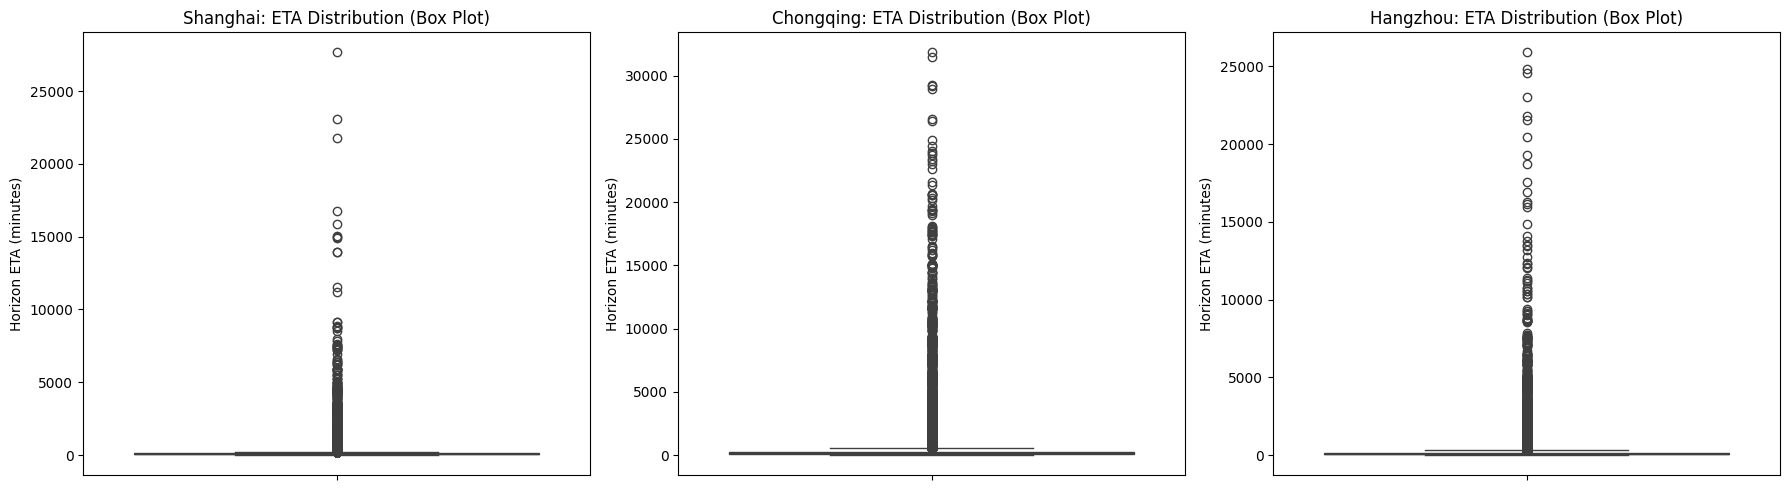

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Box plot for Shanghai
plt.subplot(1, 3, 1)
sns.boxplot(y=shanghai_df['horizon_ETA'])
plt.title('Shanghai: ETA Distribution (Box Plot)')
plt.ylabel('Horizon ETA (minutes)')

# Box plot for Chongqing
plt.subplot(1, 3, 2)
sns.boxplot(y=chongqing_df['horizon_ETA'])
plt.title('Chongqing: ETA Distribution (Box Plot)')
plt.ylabel('Horizon ETA (minutes)')

# Box plot for Hangzhou
plt.subplot(1, 3, 3)
sns.boxplot(y=hangzhou_df['horizon_ETA'])
plt.title('Hangzhou: ETA Distribution (Box Plot)')
plt.ylabel('Horizon ETA (minutes)')

plt.tight_layout()
plt.show()

The output above shows the calculated percentiles for the `horizon_ETA` in each city. The 25th and 75th percentiles represent the lower and upper bounds of the interquartile range (the box in the box plot), while the 90th and 99th percentiles give insight into the longer delivery times.

In [19]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

city_dataframes = {
    'Shanghai': shanghai_df,
    'Chongqing': chongqing_df,
    'Hangzhou': hangzhou_df
}

for city_name, df in city_dataframes.items():
    print(f"\n--- Analysis for {city_name} ---")

    # Convert horizon_ETA from minutes to hours
    eta_hours = df['horizon_ETA'] / 60

    # Ensure there's enough data for KDE, otherwise skip
    if len(eta_hours.dropna()) < 2:
        print("Not enough data to perform KDE and find peaks.")
        # 3. Calculate percentiles even if KDE is skipped
        percentiles_list = [10, 25, 50, 75, 90, 95, 99]
        for p in percentiles_list:
            print(f"{p}th percentile: {np.percentile(eta_hours.dropna(), p):.2f} hours")
        continue

    # 2. Find natural modes/clusters
    # Filter out NaNs if any, as gaussian_kde doesn't handle them
    eta_hours_clean = eta_hours.dropna()
    if len(eta_hours_clean) == 0:
        print("No valid ETA data after dropping NaNs.")
        continue

    density = gaussian_kde(eta_hours_clean)
    # Ensure the range for xs covers the data's range
    x_max = eta_hours_clean.max()
    if x_max == 0:
        print("Max ETA is 0, skipping peak finding.")
        peak_locations = []
    else:
        xs = np.linspace(0, x_max, 1000)
        density_values = density(xs)

        # Find peaks (local maxima) - height parameter might need adjustment based on data
        # Adjust height relative to the max density value or a reasonable absolute value
        height_threshold = density_values.max() * 0.1 # Example: 10% of max density
        peaks, _ = find_peaks(density_values, height=height_threshold)
        peak_locations = xs[peaks]

    if len(peak_locations) > 0:
        print(f"Natural clusters (peaks) at: {[round(p, 2) for p in peak_locations]} hours")
    else:
        print("No significant natural clusters (peaks) found.")

    # 3. Calculate percentiles
    percentiles_list = [10, 25, 50, 75, 90, 95, 99]
    for p in percentiles_list:
        print(f"{p}th percentile: {np.percentile(eta_hours_clean, p):.2f} hours")


--- Analysis for Shanghai ---
Natural clusters (peaks) at: [np.float64(0.92)] hours
10th percentile: 0.42 hours
25th percentile: 0.72 hours
50th percentile: 1.23 hours
75th percentile: 2.02 hours
90th percentile: 3.10 hours
95th percentile: 3.95 hours
99th percentile: 9.37 hours

--- Analysis for Chongqing ---
Natural clusters (peaks) at: [np.float64(1.59)] hours
10th percentile: 0.62 hours
25th percentile: 1.23 hours
50th percentile: 2.42 hours
75th percentile: 4.40 hours
90th percentile: 9.40 hours
95th percentile: 17.22 hours
99th percentile: 57.21 hours

--- Analysis for Hangzhou ---
Natural clusters (peaks) at: [np.float64(1.3)] hours
10th percentile: 0.50 hours
25th percentile: 0.88 hours
50th percentile: 1.55 hours
75th percentile: 2.63 hours
90th percentile: 4.23 hours
95th percentile: 6.43 hours
99th percentile: 13.90 hours


This percentile data shows which values to prioritise .

- Shanghai : 90th percentile is 3.10 hours, the 95th is 3.95 hours, and the 99th is 9.37 hours. This indicates that the vast majority of deliveries in Shanghai are completed relatively quickly and reliably.
- Hangzhou: Its higher percentiles (90th at 4.23 hours, 95th at 6.43 hours, 99th at 13.90 hours) are longer than Shanghai's but considerably shorter than Chongqing's.

-  Chongqing: its higher percentiles are significantly longer: the 90th percentile is 9.40 hours, the 95th is 17.22 hours, and the 99th percentile stretches to 57.21 hours. This suggests that a notable portion of deliveries in Chongqing can take a very long time, indicating potential logistical challenges or different delivery patterns.

In [ ]:


# Save each DataFrame to a CSV file
shanghai_df.to_csv(base + '/shanghai_data.csv', index=False)
chongqing_df.to_csv(base + '/chongqing_data.csv', index=False)
hangzhou_df.to_csv(base + '/hangzhou_data.csv', index=False)

# Shanghai data

In [ ]:
sh = (
    sh.sort_values(["courier_id", "order_receipt_time"])
)

In [ ]:
sh.head()

,order_id,origin_hub_id,courier_id,destination_lng,destination_lat,destination_aoi,aoi_type,order_receipt_time,order_receipt_lng,order_receipt_lat,delivery_completion_time,delivery_lng,delivery_lat,day_code,from_city
45374,225f6d9b459f44ec3a35b5be9b28e4c8,4086360c7ff1079093cf6513bea5c463,000e98aedd35d5e6b671144eff2975bb,1.057435e+07,-7.454999e+06,b77ef5cc3e0f66a0e292d6f80cc82860,203ac3454d75e02ebb0a3c6f51d735e4,2021-03-25 15:32:00,1.057408e+07,-7.454160e+06,2021-03-25 18:40:00,NaN,NaN,325,Shanghai
6069,e58da496d48efe63d1568979338e42fa,08331170e24742ba7a3938f5b34ff24d,00230f9acdd3b69b47639b261ef7d3f4,1.056388e+07,-7.456963e+06,b14921dbaae3fb6dd95445708964bd10,203ac3454d75e02ebb0a3c6f51d735e4,2021-03-18 07:36:00,1.056160e+07,-7.457989e+06,2021-03-18 08:20:00,NaN,NaN,318,Shanghai
890,f57d29b971a48b7917344a6936146c87,08331170e24742ba7a3938f5b34ff24d,00230f9acdd3b69b47639b261ef7d3f4,1.056447e+07,-7.457263e+06,df5a518553c31ccfa72ce993a3bbb4e9,203ac3454d75e02ebb0a3c6f51d735e4,2021-03-18 07:37:00,1.056159e+07,-7.457981e+06,2021-03-18 08:54:00,NaN,NaN,318,Shanghai
5333,becdb570c5b41b8782bd0e72abe4d69b,08331170e24742ba7a3938f5b34ff24d,00230f9acdd3b69b47639b261ef7d3f4,1.056388e+07,-7.456962e+06,b14921dbaae3fb6dd95445708964bd10,203ac3454d75e02ebb0a3c6f51d735e4,2021-03-18 07:37:00,1.056161e+07,-7.457997e+06,2021-03-18 08:13:00,NaN,NaN,318,Shanghai
6533,a995c4d0497a838e8b46b5808ff5bd75,08331170e24742ba7a3938f5b34ff24d,00230f9acdd3b69b47639b261ef7d3f4,1.056408e+07,-7.456605e+06,b14921dbaae3fb6dd95445708964bd10,203ac3454d75e02ebb0a3c6f51d735e4,2021-03-18 07:37:00,1.056160e+07,-7.457993e+06,2021-03-18 08:26:00,NaN,NaN,318,Shanghai
